## **Object Detection by Template Matching**


**Doc:** https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

### **One-Instance Template Matching**


In [1]:
import cv2

img = cv2.imread("../Data/Images/messi.jpg")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread("../Data/Images/messi_face.jpg", 0)
h, w = template.shape

result = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED)

# Get the best match position
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
cv2.rectangle(img, max_loc, (w + max_loc[0], h + max_loc[1]), (0, 255, 0), 2)


cv2.imshow("Detected Template", img)
cv2.imshow("Result", result)

if cv2.waitKey(0) == ord("q"):
    cv2.destroyAllWindows()

#### Explanation of Key Functions

- **`cv2.matchTemplate`**: This function computes a matching score (e.g., correlation) between the template and the target image. It supports methods like:
  - `cv2.TM_CCOEFF` (Correlation Coefficient)
  - `cv2.TM_CCOEFF_NORMED` (Normalized Correlation Coefficient)
  - `cv2.TM_SQDIFF` (Sum of Squared Differences)
  - `cv2.TM_SQDIFF_NORMED` (Normalized Sum of Squared Differences)
- **`cv2.minMaxLoc`**: Finds the global minimum and maximum values and their positions from the result of `cv2.matchTemplate`.


---


### **Multi-Instance Template Matching**


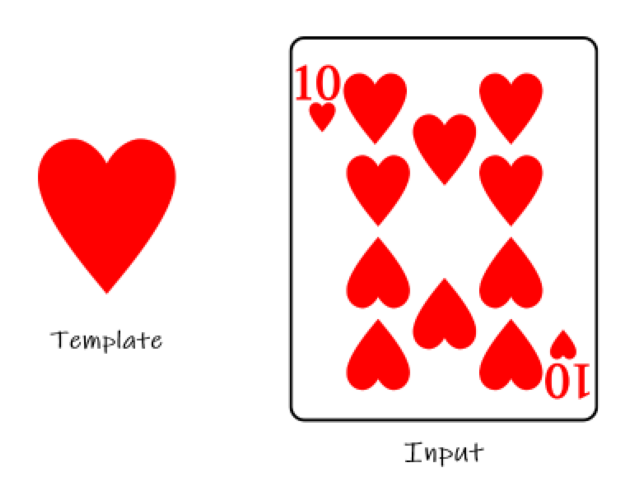

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(cv2.imread("../Data/Images/hearts_match.png"), cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

img = cv2.imread("../Data/Images/hearts_image.png")
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

template = cv2.imread("../Data/Images/hearts_match_template.png", 0)
h, w = template.shape

result = cv2.matchTemplate(grey_img, template, cv2.TM_CCORR_NORMED)

threshold = 0.964
locations = np.where(result >= threshold)

for pt in zip(*locations[::-1]):
    cv2.rectangle(img, pt, (w + pt[0], h + pt[1]), (0, 255, 0), 2)

cv2.imshow("Detected Template", img)
cv2.imshow("Result", result)

if cv2.waitKey(0) == ord("q"):
    cv2.destroyAllWindows()